## Problem Statement:

### CAR PRICE PREDICTION WITH MACHINE LEARNING (Random Forest Algorithm)
n
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many morUsing machine learning algorithms predict price of the carrnin

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

## 1. Data Extraction 

In [22]:
# load data
df = pd.read_csv('car data.csv')

# review the sample data
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
df.shape

(301, 9)

In [24]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

## Data cleaning and Exploration

In [25]:
# check for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [26]:
# Observe the data and its object type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
# describe data
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## 3. Data Preprocessing, Analysis and Visualization

In [28]:
# Convert 'Year' to the age of the car (current year - 'Year')

current_year = 2023  
df['Age'] = current_year - df['Year']

# drop 'Year' and 'Car_Name' columns as they are independent for our prediction
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Display the cleaned DataFrame
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


### 3.1 Visualization

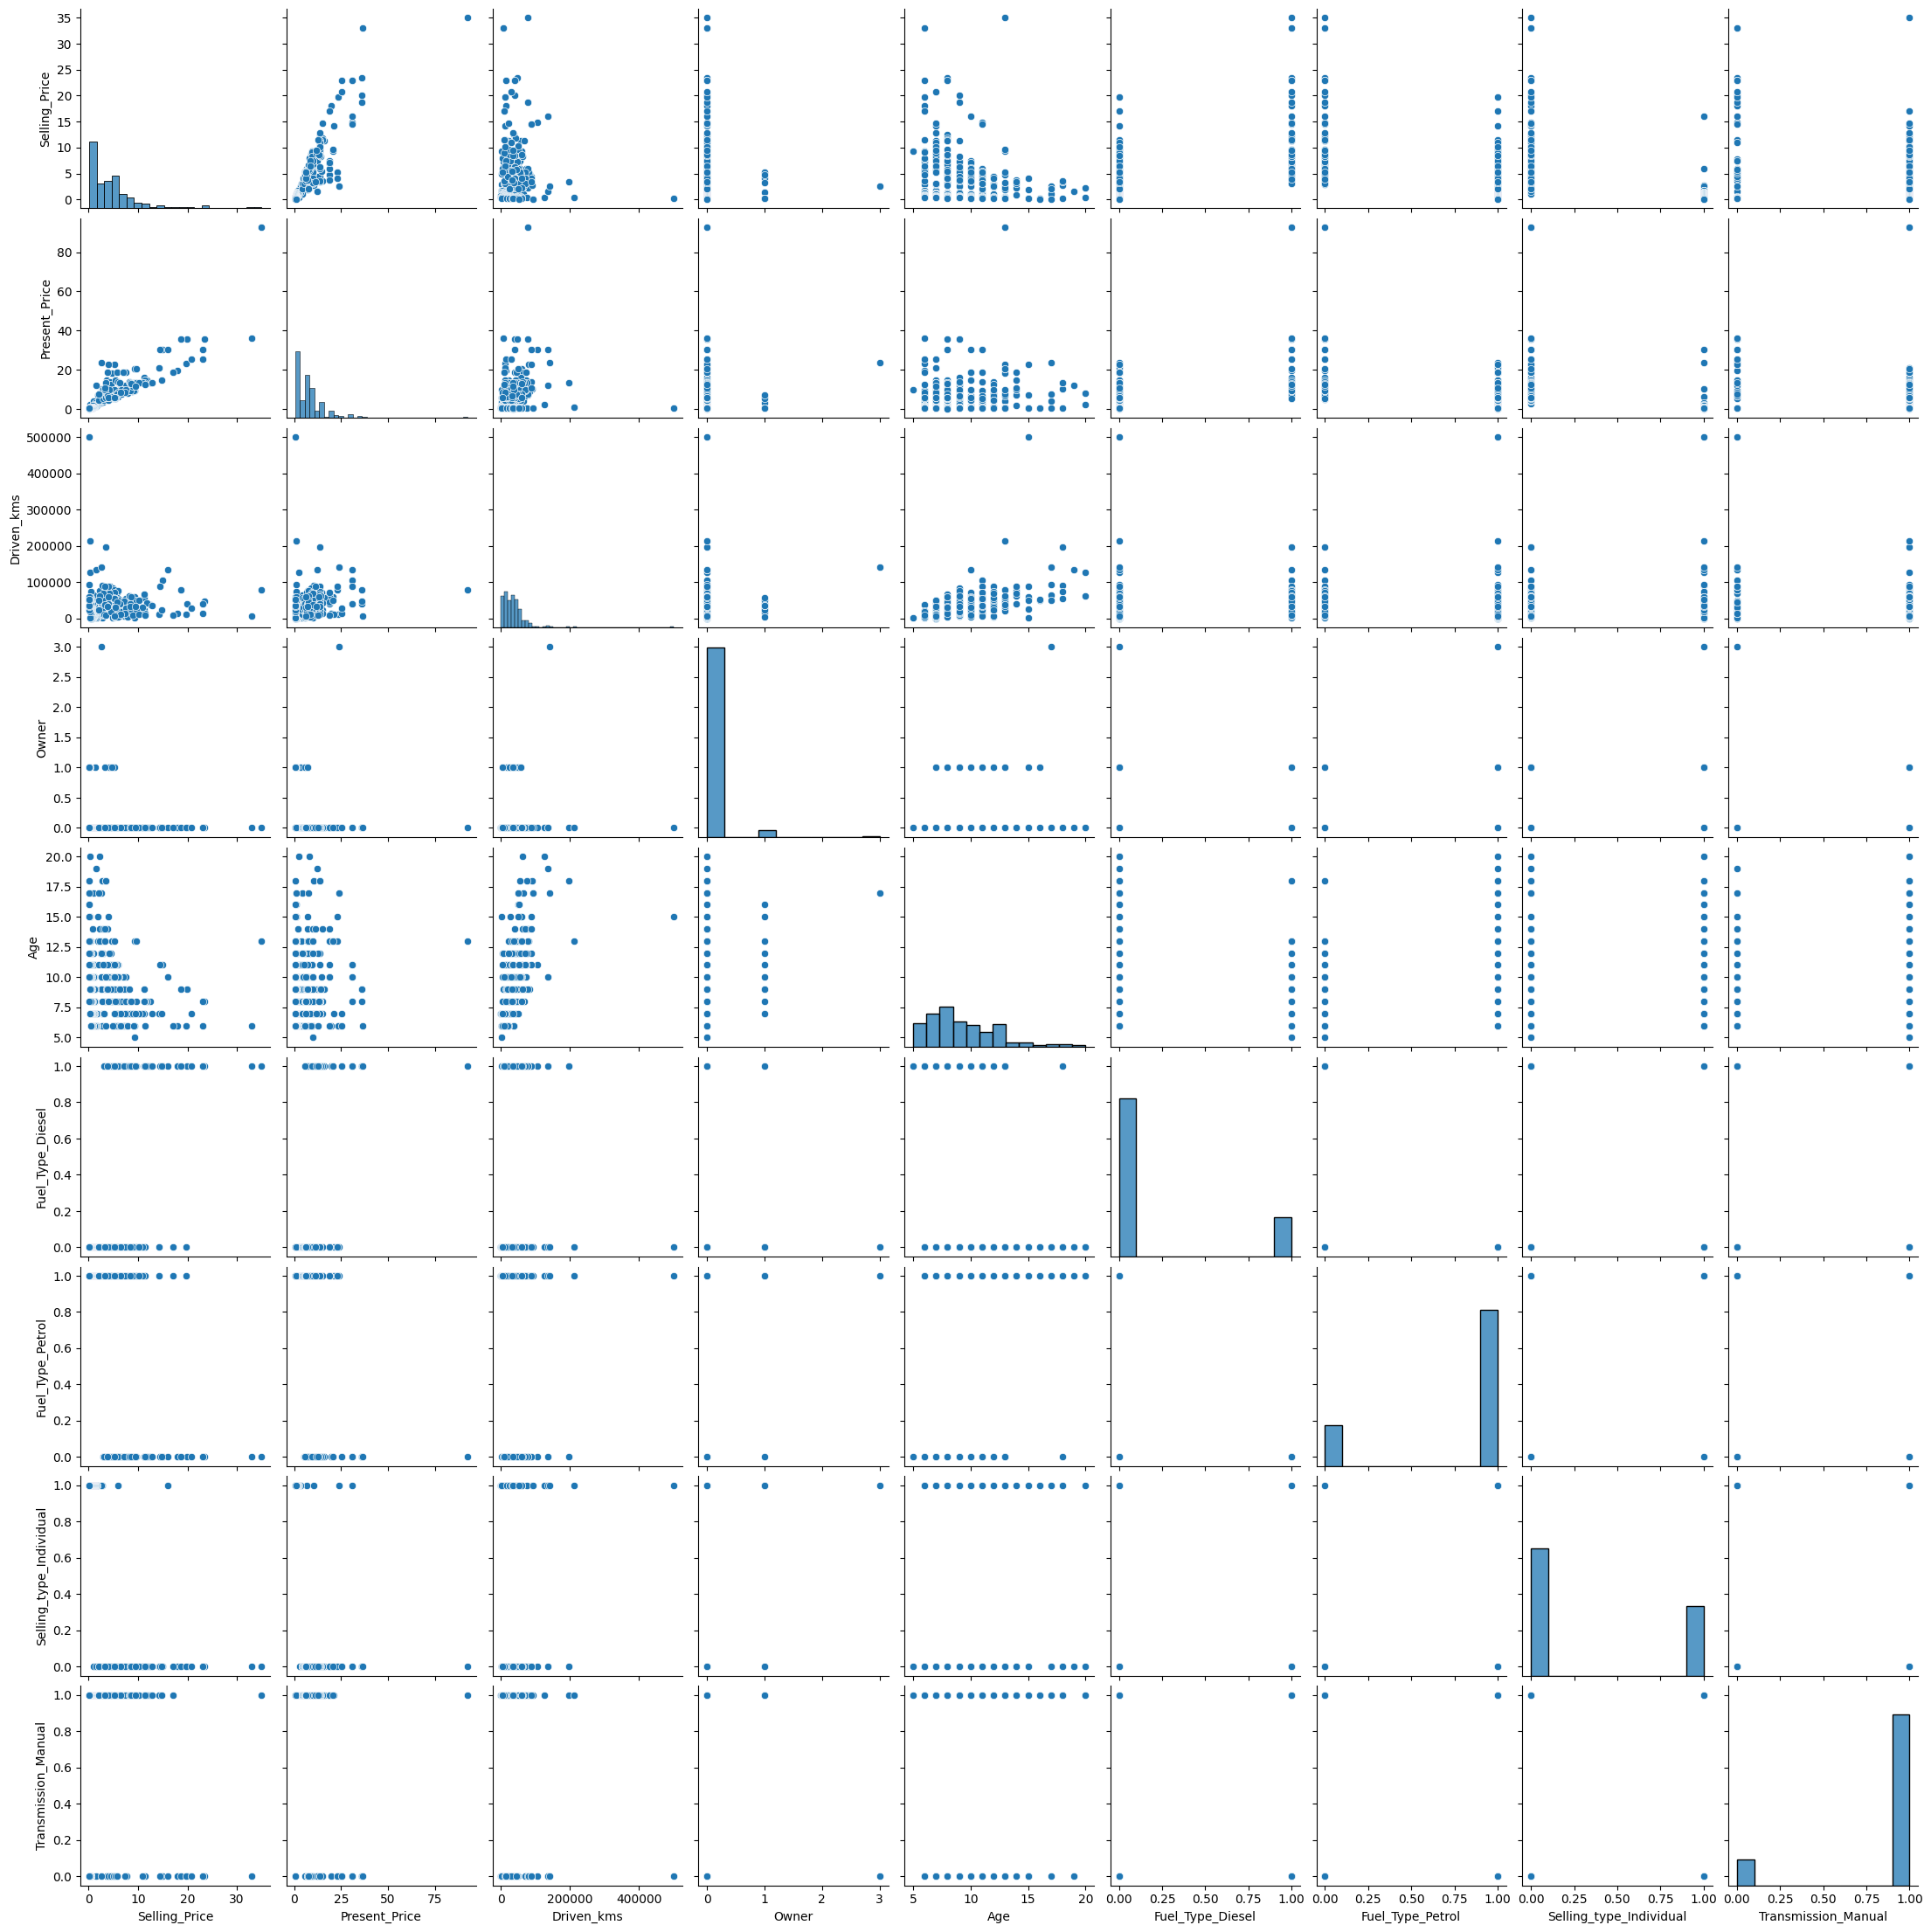

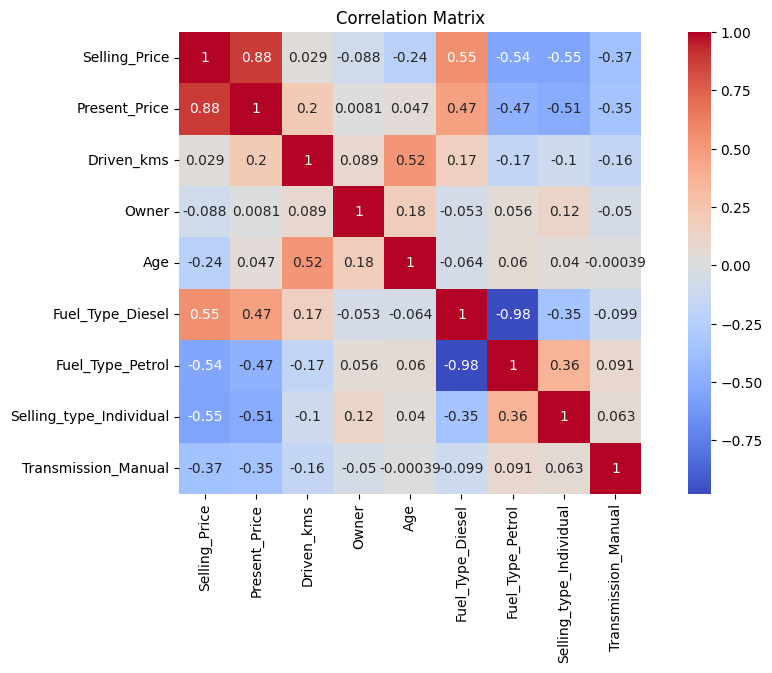

In [31]:
# Pairplot for visualization of relationships
sns.pairplot(df)
plt.show()

# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## 4. train, test, split

In [30]:
# Select features (X) and target variable (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.1 Model selection and training

In [35]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 4.2 Model Evaluation

In [40]:
# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.6368655737704919
Mean Squared Error: 0.9339387986885236


## 5. Model Testing using a Random test case

In [54]:
# Example prediction for new data

new_data = pd.DataFrame({
    'Present_Price': [10],
    'Driven_kms': [2500],
    'Owner': [2],
    'Age': [3],
    'Fuel_Type_Diesel': [1],  # Assuming Diesel fuel type
    'Fuel_Type_Petrol': [0],  # Assuming not petrol fuel type
    'Selling_type_Individual': [1],  # Assuming individual selling type
    'Transmission_Manual': [1]  # Assuming manual transmission
})

predicted_price = model.predict(new_data)
print('Predicted selling price for new data:', predicted_price)

Predicted selling price for new data: [7.984]


## 6. Conclusion

This enable to predict car prices based on features like the car's present proce, driven km, owner count, age, fuel type, selling type etc.,

The Random Forest Regressor, a powerful regression model, was utilized for prediction. However, further model tuning and feature engineering can be performed to enhance prediction accuracy. This approach can be extended and customized for real-world applications in car price prediction and related domains.